In [1]:

import sys
import os
current_dir = os.path.dirname(os.path.abspath('./'))
if not current_dir in sys.path:
    sys.path.append(current_dir)
    
from utils.structures import Pipeline, Deploy
from utils.data_management import dict2str
from typing import *
import tensorflow as tf
from sklearn.datasets import make_classification
import mne
from combiners import EpochsCombiner
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from utils.machine_learning.designer import ModelDesign, ParallelDesign, LayerDesign
from utils.machine_learning.analyzer import ModelAnalyzer, LFCNNAnalyzer
import matplotlib.colors as mc

2022-02-23 19:00:57.064366: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-23 19:00:57.064402: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:



# class LFCNNAnalyzer(object):
#     def __init__(self, model: tf.keras.Model):
#         self._model = model
#         ls_layer = self._model.get_layer(name='spatial_filters_layer')
#         weights = tf.transpose(ls_layer.weights[0], [0, 3, 1, 2]).numpy()[:, :, 0, 0]
#         biases = ls_layer.weights[1].numpy().reshape(1, -1)
#         self._latent_sources = weights + biases
    
#     @property
#     def latent_sources(self):
#         return self._latent_sources
#     @latent_sources.setter
#     def latent_sources(self, value):
#         raise AttributeError('Impossible to set latent sources time cources')
    
#     def get_available_metrics(self):
#         return list(
#             lfcnn.history.history.keys()
#         )
    
    
    
    # def plot_latent_sources(
    #     self,
    #     figsize: Optional[Union[int, tuple[int, int]]] = (10, 8),
    #     fontsize: Optional[Union[int, tuple[int, int]]] = (10, 8),
    #     title: Optional[str] = 'Latent Sources time courses',
    #     xlabel: Optional[str] = None,
    #     time_range: Optional[Union[float, tuple[float, float]]] = None,
    #     ylabel: Optional[str] = 'Latent Sources',
    #     ytricks_label: Optional[str] = 'LS ',
    #     colormap: Optional[mc.Colormap] = plt.cm.cool,
    #     colormap_size: Optional[int] = 230,
    #     inverse_colormap: Optional[bool] = True,
    #     space: Optional[Union[int, float]] = None,
    #     show: Optional[bool] = True
    # ):
    #     if isinstance(figsize, int):
    #         figsize = figsize, figsize
    #     elif not isinstance(figsize, tuple) and not isinstance(figsize, list):
    #         raise ValueError('Size of the figure can be set either by a number or by a tuple of two numbers')
        
    #     if isinstance(fontsize, int):
    #         x_fontsize = fontsize
    #         y_fontsize = fontsize
    #     elif isinstance(fontsize, tuple):
    #         x_fontsize, y_fontsize = fontsize
    #     else:
    #         raise ValueError('Size of the font for axes can be set either by a number or by a tuple of two numbers')
        
        
    #     if space is None:
    #         space = np.mean(np.max(self.latent_sources, axis=0))
        
    #     n_times, n_sources = self.latent_sources.shape
        
    #     if time_range is not None:
    #         if isinstance(time_range, float):
    #             time = np.linspace(0, time_range, n_times)
    #         elif isinstance(time_range, tuple) or isinstance(time_range, list):
    #             time = np.linspace(time_range[0], time_range[1], n_times)
    #         units = 'ms'
    #     else:
    #         time = np.linspace(0, n_times, n_times)
    #         units= 'points'
        
    #     if xlabel is None:
    #         xlabel = f'Time ({units})'
    #     else:
    #         del units
        
    #     ytricks = list()
        
    #     figure(figsize=figsize, dpi=100)
    #     for i, latent_source in enumerate(self.latent_sources.T):
    #         shift_up = space*2.5*i
    #         ytricks.append(shift_up)
            
    #         if inverse_colormap:
    #             color_index = colormap_size - int(i/n_sources*colormap_size)
    #         else:
    #             color_index = int(i/n_sources*colormap_size)
            
    #         plt.plot(time, [shift_up for _ in range(n_times)], '-', linewidth=.5, color='#cccccc')
    #         plt.plot(time, latent_source - np.mean(latent_source) + shift_up, linewidth=1, color=colormap(color_index))
        
    #     plt.title(title)
    #     plt.xlabel(xlabel)
    #     plt.xticks(fontsize=x_fontsize)
    #     plt.ylabel(ylabel)
    #     plt.yticks(ytricks, [f'{ytricks_label}{value+1}' for value in range(n_sources)], fontsize=y_fontsize)
    #     if show:
    #         plt.show()
        
    #     return plt.gcf()
    
    # def plot_patterns(self, info: mne.Info, components=None, ch_type=None,
    #             vmin=None, vmax=None, cmap='RdBu_r', sensors=True,
    #             colorbar=False, units='a.u.', res=64,
    #             size=1, cbar_fmt='%3.1f', name_format='Class %01d',
    #             show=True, show_names=False, title=None,
    #             outlines='head', contours=6,
    #             image_interp='bilinear', average=None,
    #             sphere=None):
        
    #     if components is None:
    #         n_latent_sources = self.latent_sources.shape[1]
    #         components = [0, n_latent_sources//3, 2*n_latent_sources//3, n_latent_sources-1]
    #     elif components == 'all':
    #         components = [i for i in range(self.latent_sources.shape[1])]
        
    #     import copy
    #     info = copy.deepcopy(info)
    #     info['sfreq'] = 1.
    #     patterns = mne.EvokedArray(self.latent_sources, info, tmin=0.)
    #     return patterns.plot_topomap(
    #             times=components,
    #             cmap=cmap, colorbar=colorbar, res=res,
    #             cbar_fmt=cbar_fmt, sensors=sensors, units=None, time_unit='s',
    #             time_format=name_format, size=size, show_names=show_names,
    #             title=title, outlines=outlines,
    #             contours=contours, image_interp=image_interp, show=show
    #         )




In [ ]:
# Prepare data

content_root = '../'
subjects_folder_path = os.path.join(content_root, 'Source/Subjects')
subject_path = os.path.join(subjects_folder_path, 'Az_Mar_05')
info_path = os.path.join(subject_path, 'Info',
                        'ML_Subject05_P1_tsss_mc_trans_info.pkl')

resp_lock_lm_B1_epochs_path = os.path.join(
    subject_path, 'Epochs', 'RespCor_LM_B1_epochs.fif')
resp_lock_rm_B1_epochs_path = os.path.join(
    subject_path, 'Epochs', 'RespCor_RM_B1_epochs.fif')
resp_lock_li_B1_epochs_path = os.path.join(
    subject_path, 'Epochs', 'RespCor_LI_B1_epochs.fif')
resp_lock_ri_B1_epochs_path = os.path.join(
    subject_path, 'Epochs', 'RespCor_RI_B1_epochs.fif')

resp_lock_lm_B1_epochs = mne.read_epochs(resp_lock_lm_B1_epochs_path)
resp_lock_li_B1_epochs = mne.read_epochs(resp_lock_li_B1_epochs_path)
resp_lock_rm_B1_epochs = mne.read_epochs(resp_lock_rm_B1_epochs_path)
resp_lock_ri_B1_epochs = mne.read_epochs(resp_lock_ri_B1_epochs_path)

resp_lock_li_B1_epochs.resample(200)
resp_lock_lm_B1_epochs.resample(200)
resp_lock_ri_B1_epochs.resample(200)
resp_lock_rm_B1_epochs.resample(200)

combiner = EpochsCombiner(
    resp_lock_lm_B1_epochs.copy(),
    resp_lock_li_B1_epochs.copy(),
    resp_lock_rm_B1_epochs.copy(),
    resp_lock_ri_B1_epochs.copy()
)
first_class_indices = (0, 1)
second_class_indices = (2, 3)
combiner.combine(first_class_indices, second_class_indices, shuffle=True)

In [13]:
n_epochs, n_channels, n_times = combiner.X.shape


lfcnn_design = ModelDesign(
    tf.keras.Input(shape=(n_channels, n_times, 1), name='input_layer'),
    tf.keras.layers.Conv2D(32, (n_channels, 1), activation=tf.nn.relu, name='spatial_filters_layer'),
    tf.keras.layers.DepthwiseConv2D((1, 15), padding='same', activation=tf.nn.relu, name='temporal_filters_layer'),
    Deploy(tf.transpose, perm=(0, 3, 2, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(1, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
)
print(lfcnn_design().shape)
# lfcnn = lfcnn_design.build()


(None, 1)


In [36]:
n_epochs, n_channels, n_times = combiner.X.shape

dropout_rate = 0.2
regularizer = 'l2'
activation = tf.keras.activations.relu

lfcnn_design = ModelDesign(
    tf.keras.Input(
        shape=(n_channels, n_times, 1),
        name='input_layer'
    ),
    tf.keras.layers.Conv2D(
        32,
        (n_channels, 1),
        activation=activation, name='spatial_filters_layer',
        kernel_regularizer=regularizer
    ),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.DepthwiseConv2D(
        (1, 15),
        padding='same',
        activation=activation,
        name='temporal_filters_layer',
        kernel_regularizer=regularizer
    ),
    tf.keras.layers.Dropout(dropout_rate),
    Deploy(tf.transpose, perm=(0, 3, 2, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(1, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        400,
        activation=activation,
        kernel_regularizer=regularizer
    ),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(
        200,
        activation=activation,
        kernel_regularizer=regularizer
    ),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(
        100,
        activation=activation,
        kernel_regularizer=regularizer
    ),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(
        50,
        activation=activation,
        kernel_regularizer=regularizer
    ),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(
        1,
        activation=tf.nn.sigmoid,
        kernel_regularizer=regularizer
    ),
)



In [ ]:


lfcnn = lfcnn_design.build()
lfcnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredLogarithmicError(),
    metrics=['acc'],
    # run_eagerly=True
    # metrics=[tf.keras.metrics.BinaryAccuracy()],
)

X = combiner.X.copy()
Y = combiner.Y.copy()

X = np.reshape(X, (*X.shape, 1))

lfcnn.fit(
    X,
    Y,
    epochs=25,
    validation_split=0.2,
    shuffle=True,
    # batch_size=50,
    # callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),]
)

In [ ]:
X = np.random.rand(*X.shape)
print(
    lfcnn(X).numpy()
)

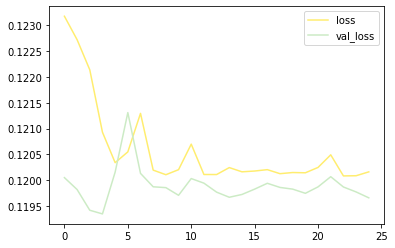

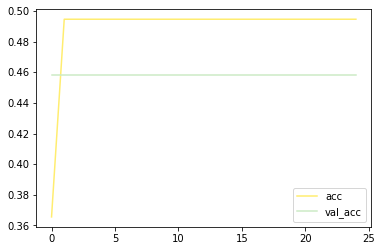

<Figure size 432x288 with 0 Axes>

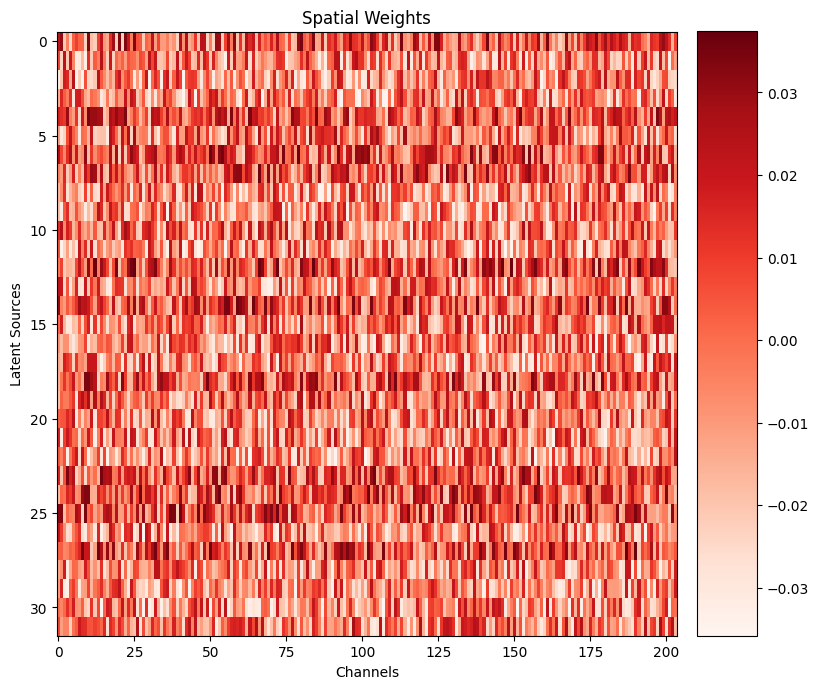

<Figure size 432x288 with 0 Axes>

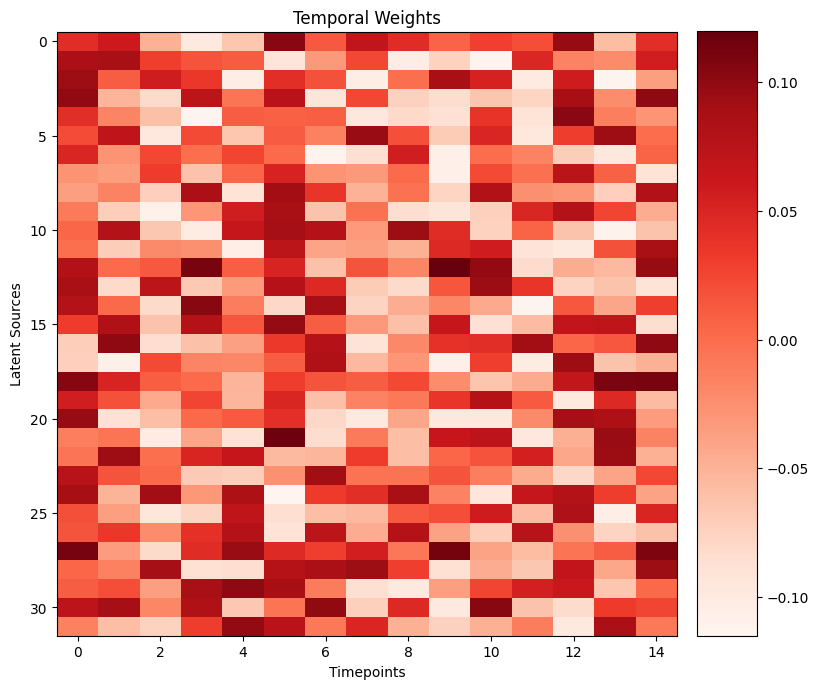

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [42]:
ma = LFCNNAnalyzer(lfcnn)

ma.plot_metrics(['loss', 'val_loss'])
ma.plot_metrics(['acc', 'val_acc'])
ma.plot_spatial_weights()
ma.plot_temporal_weights(transpose=True)

In [14]:

#b% LFCNN explore
# n_channels = 204
# n_times = 200

lfcnn_design = ModelDesign(
    # 204 x 200 x 1 == n_channels x times x 1 == width x height x channels
    tf.keras.Input(shape=(n_channels, n_times, 1), name='input_layer'), 
    # 1 x 200 x 32 == 1 x times x latent_sources == width x height x layers
    tf.keras.layers.Conv2D(32, (n_channels, 1), strides=(n_channels, 1), activation=tf.nn.relu, name='spatial_filters_layer'),
    # 1 x 200 x 32 == 1 x times x latent_sources == width x height x layers
    tf.keras.layers.DepthwiseConv2D((1, 15), padding='same', activation=tf.nn.relu, name='temporal_filters_layer'), 
    # 32 x 200 x 1 == latent_sources x times x 1 == layers x height x width -> width x height x layers
    Deploy(tf.transpose, perm=(0, 3, 2, 1)),
    # 32 x 100 x 1 == latent_sources x times/2 x 1 == width x height/2 x layers
    tf.keras.layers.MaxPool2D(pool_size=(1, 2)),
    # 32 X 100 x 1 == 32*100*1 == 3200 == width*height*layers
    tf.keras.layers.Flatten(),
    # 400 == neurons
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    # 200 == neurons
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    # 100 == neurons
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    # 50 == neurons
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    # 1 == neuron
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
)

slfcnn_design = ModelDesign(
    tf.keras.Input(shape=(n_channels, n_times, 1), name='input_layer'), 
    tf.keras.layers.Conv2D(32, (n_channels, 1), activation=tf.nn.relu, name='spatial_filters_layer'),
    tf.keras.layers.DepthwiseConv2D((1, 15), padding='same', activation=tf.nn.relu, name='temporal_filters_layer'), 
    Deploy(tf.transpose, perm=(0, 3, 2, 1)),
    tf.keras.layers.DepthwiseConv2D((32, 1), activation=tf.nn.relu, name='selection_filters_layer'), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
)


In [ ]:

lfcnn = slfcnn_design.build()
lfcnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredLogarithmicError(),
    metrics=['acc'],
    # run_eagerly=True
    # metrics=[tf.keras.metrics.BinaryAccuracy()],
)

X = combiner.X.copy()
Y = combiner.Y.copy()

# X = np.reshape(X, (*X.shape, 1))

lfcnn.fit(
    X,
    Y,
    epochs=25,
    validation_split=0.2,
    shuffle=True,
    # batch_size=50,
    # callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),]
)

ma = LFCNNAnalyzer(lfcnn)

ma.plot_metrics(['loss', 'val_loss'])
ma.plot_metrics(['acc', 'val_acc'])
ma.plot_spatial_weights()
ma.plot_temporal_weights(transpose=True)

In [ ]:
print(ma.layers['selection_filters_layer'].data.shape)
ma.plot_1d_weights(layer_identifier='selection_filters_layer', xlabel='latent sources')

In [94]:

ma.layers[0].data.min(axis=0)

array([-0.02370242, -0.03569487, -0.03601984, -0.03490067, -0.03558787,
       -0.02384985, -0.01526222, -0.0179078 , -0.03559895, -0.02427137,
       -0.02425034, -0.03556277, -0.02024651, -0.03563198, -0.03530978,
       -0.03578351, -0.02392447, -0.03574905, -0.01621586, -0.03545845,
       -0.03554488, -0.03563854, -0.03716536, -0.03563905, -0.03544886,
       -0.03565804, -0.03375558, -0.03542249, -0.03544887, -0.03486858,
       -0.03308237, -0.01848016], dtype=float32)

In [34]:
from sklearn.datasets import make_classification

X, Y = make_classification(
    n_samples=1000, n_features=20, n_redundant=10,
    n_informative=4, n_clusters_per_class=1, class_sep=.2
)

# X = np.random.rand(*X.shape)

In [36]:
regularizer = None
dropout_rate = 0.


dense_model_design = ModelDesign(
    tf.keras.Input(shape=(20,), name='input_layer'),
    tf.keras.layers.Dense(400, activation=tf.nn.relu, kernel_regularizer=regularizer),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(200, activation=tf.nn.relu, kernel_regularizer=regularizer),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_regularizer=regularizer),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
)

model = dense_model_design.build()

import visualkeras

visualkeras.layered_view(model).show() 


In [38]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model_design = ModelDesign(
    tf.keras.Input(shape=(20,)),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
)
dense_model = model_design.build()

# dense_model = dense_model_design.build()

dense_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredLogarithmicError(),
    metrics=['acc'],
)


dense_model.fit(
    X,
    Y,
    epochs=25,
    batch_size=50,
    validation_split=0.4,
    shuffle=True,
    # callbacks = [callback]
)

# ma = ModelAnalyzer(dense_model)

# ma.plot_metrics(['loss', 'val_loss'])
# ma.plot_metrics(['acc', 'val_acc'])

Epoch 1/25
12/12 [==============================] - 1s 23ms/step - loss: 0.0964 - acc: 0.6500 - val_loss: 0.0725 - val_acc: 0.7825
Epoch 2/25
12/12 [==============================] - 0s 8ms/step - loss: 0.0545 - acc: 0.8417 - val_loss: 0.0548 - val_acc: 0.8475
Epoch 3/25
12/12 [==============================] - 0s 8ms/step - loss: 0.0380 - acc: 0.8883 - val_loss: 0.0476 - val_acc: 0.8775
Epoch 4/25
12/12 [==============================] - 0s 7ms/step - loss: 0.0276 - acc: 0.9167 - val_loss: 0.0446 - val_acc: 0.8875
Epoch 5/25
12/12 [==============================] - 0s 6ms/step - loss: 0.0204 - acc: 0.9550 - val_loss: 0.0443 - val_acc: 0.8825
Epoch 6/25
12/12 [==============================] - 0s 7ms/step - loss: 0.0175 - acc: 0.9500 - val_loss: 0.0440 - val_acc: 0.8800
Epoch 7/25
12/12 [==============================] - 0s 6ms/step - loss: 0.0124 - acc: 0.9650 - val_loss: 0.0451 - val_acc: 0.8825
Epoch 8/25
12/12 [==============================] - 0s 7ms/step - loss: 0.0095 - acc: 0.9

In [90]:
print(ma.layers[-1].data)

[[ 0.28794816  0.25442106 -0.16017462  0.12478162 -0.10398948  0.13091327
  -0.39604065 -0.22806226  0.23177499 -0.11579487  0.01850181  0.15289313
   0.08507282  0.2744482   0.19162181 -0.17402907  0.29217383 -0.12019952
  -0.03993115 -0.2213158  -0.10618912  0.21726328  0.41990477 -0.2922158
   0.13981622 -0.14721377  0.13732159  0.09764832 -0.2840972   0.20160934
  -0.19292592  0.25872287 -0.18873262  0.09408452  0.27908763 -0.30385247
   0.23404387  0.3168481   0.27306384 -0.08241455  0.3954652   0.23290153
   0.20237318 -0.1770898   0.36754182  0.3738451   0.21942276  0.20391443
   0.1055859   0.26441956]]


In [111]:
pred = dense_model(X).numpy()

correct = 0
for p, y in zip(pred[:, 0], Y):
    if int(p) == y:
        correct += 1
    # print(int(p), y)
print(correct/len(Y))

0.741


In [2]:

data, Y = make_classification(
    n_samples=1000, n_features=20, n_redundant=10, n_informative=4, n_clusters_per_class=1, class_sep=.2
)

Epoch 1/50
19/19 [==============================] - 2s 33ms/step - loss: 0.0846 - acc: 0.7317 - val_loss: 0.0761 - val_acc: 0.7975
Epoch 2/50
19/19 [==============================] - 0s 24ms/step - loss: 0.0603 - acc: 0.8367 - val_loss: 0.0802 - val_acc: 0.8050
Epoch 3/50
19/19 [==============================] - 0s 23ms/step - loss: 0.0616 - acc: 0.8567 - val_loss: 0.0814 - val_acc: 0.8150
Epoch 4/50
19/19 [==============================] - 0s 23ms/step - loss: 0.0898 - acc: 0.8083 - val_loss: 0.0770 - val_acc: 0.8375
Epoch 5/50
19/19 [==============================] - 0s 24ms/step - loss: 0.0919 - acc: 0.8067 - val_loss: 0.1566 - val_acc: 0.6700
Epoch 6/50
19/19 [==============================] - 0s 24ms/step - loss: 0.2087 - acc: 0.5633 - val_loss: 0.2214 - val_acc: 0.5375
Epoch 7/50
19/19 [==============================] - 0s 23ms/step - loss: 0.1312 - acc: 0.7267 - val_loss: 0.1686 - val_acc: 0.6475
Epoch 8/50
19/19 [==============================] - 0s 24ms/step - loss: 0.1409 - a

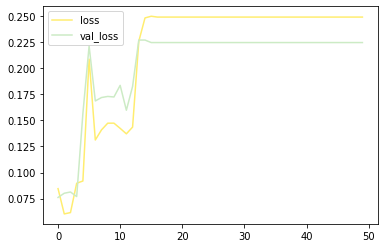

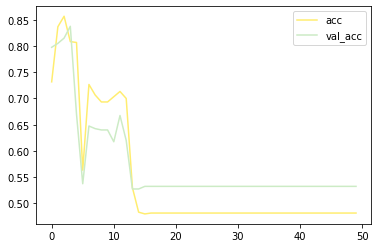

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [206]:

X = None

inputs = tf.keras.Input(shape=(20,))
X = tf.keras.layers.Dense(200, activation=tf.nn.relu)(inputs)
X = tf.keras.layers.Dense(1000)(X)
X = tf.keras.layers.Dense(1000)(X)
X = tf.keras.layers.Dense(1000)(X)
X = tf.keras.layers.Dense(1000)(X)
X = tf.keras.layers.Dense(200, activation=tf.nn.relu)(X)
X = tf.keras.layers.Dense(100, activation=tf.nn.relu)(X)
X = tf.keras.layers.Dense(50, activation=tf.nn.relu)(X)
X = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(X)
model = tf.keras.Model(inputs=inputs, outputs=X)


# model_design = tf.keras.Sequential(
#     tf.keras.Input(shape=(20,)),
#     tf.keras.layers.Dense(200, activation=tf.nn.relu),
#     tf.keras.layers.Dense(200, activation=tf.nn.relu),
#     tf.keras.layers.Dense(100, activation=tf.nn.relu),
#     tf.keras.layers.Dense(50, activation=tf.nn.relu),
#     tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
# )
# model = model_design.build()


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredLogarithmicError(),
    metrics=['acc']
)

model.fit(
    data,
    Y,
    epochs=50,
    validation_split=0.4,
    shuffle=True,
)


model_analyzer = ModelAnalyzer(model)

model_analyzer.plot_metrics(['loss', 'val_loss'])
model_analyzer.plot_metrics(['acc', 'val_acc'])

Epoch 1/50
19/19 [==============================] - 3s 45ms/step - loss: 0.0783 - acc: 0.7133 - val_loss: 0.0549 - val_acc: 0.7925
Epoch 2/50
19/19 [==============================] - 0s 26ms/step - loss: 0.0444 - acc: 0.8467 - val_loss: 0.0392 - val_acc: 0.8950
Epoch 3/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0355 - acc: 0.8967 - val_loss: 0.0619 - val_acc: 0.8200
Epoch 4/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0380 - acc: 0.8950 - val_loss: 0.0350 - val_acc: 0.9050
Epoch 5/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0522 - acc: 0.8833 - val_loss: 0.1481 - val_acc: 0.6800
Epoch 6/50
19/19 [==============================] - 1s 27ms/step - loss: 0.1482 - acc: 0.6800 - val_loss: 0.1446 - val_acc: 0.6950
Epoch 7/50
19/19 [==============================] - 1s 30ms/step - loss: 0.1626 - acc: 0.6600 - val_loss: 0.1807 - val_acc: 0.6225
Epoch 8/50
19/19 [==============================] - 0s 26ms/step - loss: 0.1618 - a

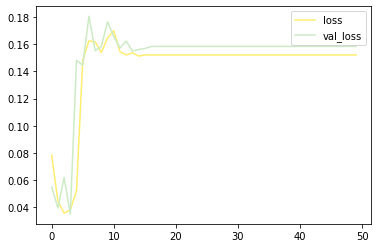

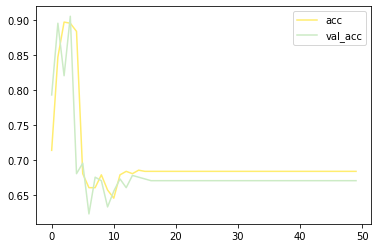

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [41]:
X = None

inputs = tf.keras.Input(shape=(20,))
X = tf.keras.layers.Dense(200, activation=tf.nn.relu)(inputs)
X = tf.keras.layers.Dense(1000)(X)
X_shortcut1 = X
X_shortcut2 = X
X_shortcut1 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(X_shortcut1)
X_shortcut1 = tf.keras.layers.Dense(100, activation=tf.nn.relu)(X_shortcut1)
X_shortcut11 = X_shortcut1
X_shortcut1 = tf.keras.layers.Dense(100, activation=tf.nn.relu)(X_shortcut1)
X_shortcut1 = tf.keras.layers.Add()([X_shortcut1, X_shortcut11])
X_shortcut1 = tf.keras.layers.Dense(100, activation=tf.nn.relu)(X_shortcut1)
X_shortcut1 = tf.keras.layers.Dense(1000, activation=tf.nn.relu)(X_shortcut1)
X = tf.keras.layers.Dense(1000)(X)
X = tf.keras.layers.Dense(1000)(X)
X = tf.keras.layers.Add()([X, X_shortcut1, X_shortcut2])
X = tf.keras.layers.Activation('relu')(X)
X = tf.keras.layers.Dense(1000)(X)
X = tf.keras.layers.Dense(200, activation=tf.nn.relu)(X)
X = tf.keras.layers.Dense(100, activation=tf.nn.relu)(X)
X = tf.keras.layers.Dense(50, activation=tf.nn.relu)(X)
X = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(X)

model = tf.keras.Model(inputs=inputs, outputs=X)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredLogarithmicError(),
    metrics=['acc']
)

model.fit(
    data,
    Y,
    epochs=50,
    validation_split=0.4,
    shuffle=True
)


model_analyzer = ModelAnalyzer(model)

model_analyzer.plot_metrics(['loss', 'val_loss'])
model_analyzer.plot_metrics(['acc', 'val_acc'])

In [ ]:
def skip_block(X):
    
    X_shortcut = X
    X = tf.keras.layers.Dense(1000)(X)
    X = tf.keras.layers.Dense(1000)(X)
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)

    return X

def res_block(X):
    X_shortcut1 = X
    X_shortcut2 = X
    X_shortcut1 = tf.keras.layers.Dense(50, activation=tf.nn.relu, name='Dense50_in_shortcut1')(X_shortcut1)
    X_shortcut1 = tf.keras.layers.Dense(100, activation=tf.nn.relu, name='Dense100_in_shortcut1_before_skip')(X_shortcut1)
    X_shortcut11 = X_shortcut1
    X_shortcut1 = tf.keras.layers.Dense(100, activation=tf.nn.relu, name='Dense100_in_shortcut1_in_skip')(X_shortcut1)
    X_shortcut1 = tf.keras.layers.Add()([X_shortcut1, X_shortcut11])
    X_shortcut1 = tf.keras.layers.Dense(100, activation=tf.nn.relu, name='Dense100_in_shortcut1_after_skip')(X_shortcut1)
    X_shortcut1 = tf.keras.layers.Dense(1000, activation=tf.nn.relu, name='Dense1000_in_shortcut1')(X_shortcut1)
    X = tf.keras.layers.Dense(1000, name='Dense1000_1_in_res_block')(X)
    X = tf.keras.layers.Dense(1000, name='Dense1000_2_in_res_block')(X)
    X = tf.keras.layers.Add()([X, X_shortcut1, X_shortcut2])
    X = tf.keras.layers.Activation('relu')(X)
    
    return X

def res_designed(X):
    X_shortcut1 = X
    X_shortcut2 = X
    X_shortcut1 = ModelDesign(
        X_shortcut1,
        tf.keras.layers.Dense(50, activation=tf.nn.relu, name='Dense50_in_shortcut1'),
        tf.keras.layers.Dense(100, activation=tf.nn.relu, name='Dense100_in_shortcut1_before_skip')
    )()
    X_shortcut11 = X_shortcut1
    X_shortcut1 = ModelDesign(
        X_shortcut1,
        tf.keras.layers.Dense(100, activation=tf.nn.relu, name='Dense100_in_shortcut1_in_skip'),
    )()
    X_shortcut1 = tf.keras.layers.Add()([X_shortcut1, X_shortcut11])
    X_shortcut1 = ModelDesign(
        X_shortcut1,
        tf.keras.layers.Dense(100, activation=tf.nn.relu, name='Dense100_in_shortcut1_after_skip'),
        tf.keras.layers.Dense(1000, activation=tf.nn.relu, name='Dense1000_in_shortcut1')
    )()
    X = ModelDesign(
        X,
        tf.keras.layers.Dense(1000, name='Dense1000_1_in_res_block'),
        tf.keras.layers.Dense(1000, name='Dense1000_2_in_res_block')
    )()
    X = tf.keras.layers.Add()([X, X_shortcut1, X_shortcut2])
    X = tf.keras.layers.Activation('relu')(X)
    
    return X

model_design = ModelDesign(
    tf.keras.Input(shape=(20,), name='input_layer'),
    tf.keras.layers.Dense(200, activation=tf.nn.relu, name='Dense200'),
    tf.keras.layers.Dense(1000, name='Dense1000_before_res_block'),
    res_designed,
    tf.keras.layers.Dense(1000, name='Dense1000_after_res_block'),
    tf.keras.layers.Dense(100, activation=tf.nn.relu, name='Dense100_in_main_design'),
    tf.keras.layers.Dense(50, activation=tf.nn.relu, name='Dense50_in_main_design'),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, name='output_layer')
)


model = model_design.build()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredLogarithmicError(),
    metrics=['acc']
)
model.fit(
    data,
    Y,
    epochs=50,
    validation_split=0.4,
    shuffle=True
)

model_analyzer = ModelAnalyzer(model)

model_analyzer.plot_metrics(['loss', 'val_loss'])
model_analyzer.plot_metrics(['acc', 'val_acc'])

In [ ]:
def skip_block(X):
    
    X_shortcut = X
    X = tf.keras.layers.Dense(1000)(X)
    X = tf.keras.layers.Dense(1000)(X)
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)

    return X

def res_block(X):
    X_shortcut1 = X
    X_shortcut2 = X
    X_shortcut1 = tf.keras.layers.Dense(50, activation=tf.nn.relu, name='Dense50_in_shortcut1')(X_shortcut1)
    X_shortcut1 = tf.keras.layers.Dense(100, activation=tf.nn.relu, name='Dense100_in_shortcut1_before_skip')(X_shortcut1)
    X_shortcut11 = X_shortcut1
    X_shortcut1 = tf.keras.layers.Dense(100, activation=tf.nn.relu, name='Dense100_in_shortcut1_in_skip')(X_shortcut1)
    X_shortcut1 = tf.keras.layers.Add()([X_shortcut1, X_shortcut11])
    X_shortcut1 = tf.keras.layers.Dense(100, activation=tf.nn.relu, name='Dense100_in_shortcut1_after_skip')(X_shortcut1)
    X_shortcut1 = tf.keras.layers.Dense(1000, activation=tf.nn.relu, name='Dense1000_in_shortcut1')(X_shortcut1)
    X = tf.keras.layers.Dense(1000, name='Dense1000_1_in_res_block')(X)
    X = tf.keras.layers.Dense(1000, name='Dense1000_2_in_res_block')(X)
    X = tf.keras.layers.Add()([X, X_shortcut1, X_shortcut2])
    X = tf.keras.layers.Activation('relu')(X)
    
    return X

def res_designed(X):
    X_shortcut1 = X
    X_shortcut2 = X
    X_shortcut1 = ModelDesign(
        X_shortcut1,
        tf.keras.layers.Dense(50, activation=tf.nn.relu, name='Dense50_in_shortcut1'),
        tf.keras.layers.Dense(100, activation=tf.nn.relu, name='Dense100_in_shortcut1_before_skip')
    )()
    X_shortcut11 = X_shortcut1
    X_shortcut1 = ModelDesign(
        X_shortcut1,
        tf.keras.layers.Dense(100, activation=tf.nn.relu, name='Dense100_in_shortcut1_in_skip'),
    )()
    X_shortcut1 = tf.keras.layers.Add()([X_shortcut1, X_shortcut11])
    X_shortcut1 = ModelDesign(
        X_shortcut1,
        tf.keras.layers.Dense(100, activation=tf.nn.relu, name='Dense100_in_shortcut1_after_skip'),
        tf.keras.layers.Dense(1000, activation=tf.nn.relu, name='Dense1000_in_shortcut1')
    )()
    X = ModelDesign(
        X,
        tf.keras.layers.Dense(1000, name='Dense1000_1_in_res_block'),
        tf.keras.layers.Dense(1000, name='Dense1000_2_in_res_block')
    )()
    X = tf.keras.layers.Add()([X, X_shortcut1, X_shortcut2])
    X = tf.keras.layers.Activation('relu')(X)
    
    return X

model_design = ModelDesign(
    tf.keras.Input(shape=(20,), name='input_layer'),
    tf.keras.layers.Dense(200, activation=tf.nn.relu, name='Dense200'),
    tf.keras.layers.Dense(1000, name='Dense1000_before_res_block'),
    res_designed,
    tf.keras.layers.Dense(1000, name='Dense1000_after_res_block'),
    tf.keras.layers.Dense(100, activation=tf.nn.relu, name='Dense100_in_main_design'),
    tf.keras.layers.Dense(50, activation=tf.nn.relu, name='Dense50_in_main_design'),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, name='output_layer')
)


model = model_design.build()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredLogarithmicError(),
    metrics=['acc']
)
model.fit(
    data,
    Y,
    epochs=50,
    validation_split=0.4,
    shuffle=True
)

model_analyzer = ModelAnalyzer(model)

model_analyzer.plot_metrics(['loss', 'val_loss'])
model_analyzer.plot_metrics(['acc', 'val_acc'])

Epoch 1/50
19/19 [==============================] - 2s 47ms/step - loss: 13.1632 - acc: 0.5867 - val_loss: 6.4532 - val_acc: 0.6225
Epoch 2/50
19/19 [==============================] - 1s 38ms/step - loss: 3.6012 - acc: 0.6200 - val_loss: 1.4921 - val_acc: 0.4850
Epoch 3/50
19/19 [==============================] - 1s 38ms/step - loss: 0.7707 - acc: 0.6267 - val_loss: 0.3133 - val_acc: 0.5975
Epoch 4/50
19/19 [==============================] - 1s 38ms/step - loss: 0.1989 - acc: 0.6150 - val_loss: 0.1334 - val_acc: 0.6100
Epoch 5/50
19/19 [==============================] - 1s 39ms/step - loss: 0.1179 - acc: 0.6233 - val_loss: 0.1151 - val_acc: 0.6100
Epoch 6/50
19/19 [==============================] - 1s 38ms/step - loss: 0.1097 - acc: 0.6350 - val_loss: 0.1145 - val_acc: 0.6075
Epoch 7/50
19/19 [==============================] - 1s 40ms/step - loss: 0.1091 - acc: 0.6200 - val_loss: 0.1109 - val_acc: 0.5800
Epoch 8/50
19/19 [==============================] - 1s 43ms/step - loss: 0.1066 - 

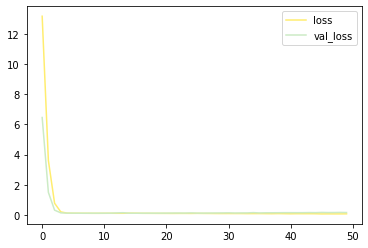

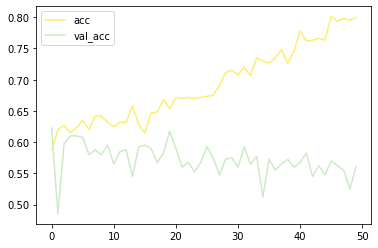

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [18]:
res_design1 = ModelDesign(
    None,
    tf.keras.layers.Dense(50, activation=tf.nn.relu, name='res_design1_1'),
    tf.keras.layers.Dense(100, activation=tf.nn.relu, name='res_design1_2')
)

res_design2 = ModelDesign(
    None,
    tf.keras.layers.Dense(100, activation=tf.nn.relu, name='res_design2'),
)

res_design3 = ModelDesign(
    None,
    tf.keras.layers.Dense(100, activation=tf.nn.relu, name='res_design3_1'),
    tf.keras.layers.Dense(1000, activation=tf.nn.relu, name='res_design3_2')
)

res_design4 = ModelDesign(
    None,
    tf.keras.layers.Dense(1000, name='res_design4_1'),
    tf.keras.layers.Dense(1000, name='res_design4_2')
)

res_design4r = ModelDesign(
    None,
    tf.keras.layers.Dense(1000, name='res_design4r_1', kernel_regularizer='l2'),
    tf.keras.layers.Dense(1000, name='res_design4r_2', kernel_regularizer='l2')
)

res_design5 = ModelDesign(
    None,
    tf.keras.layers.Dense(50, name='res_design5_1', kernel_regularizer='l2', activation='relu'),
    tf.keras.layers.Dense(250, name='res_design5_2', activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(500, name='res_design5_3', activation='relu'),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(1000, name='res_design5_4', activation='relu'),
    tf.keras.layers.Dropout(.4)
)

res_design12 = ModelDesign(
    None,
    res_design1,
    ParallelDesign(None, res_design2),
    res_design3
)


model_design = ModelDesign(
    tf.keras.Input(shape=(20,), name='input_layer'),
    tf.keras.layers.Dense(200, activation=tf.nn.relu, name='main1'),
    tf.keras.layers.Dense(1000, name='main2'),
    ParallelDesign(
        None,
        res_design12,
        ParallelDesign(
            None,
            res_design4,
            res_design4r,
            activation='relu'
        ),
        res_design5,
        activation='relu'
    ),
    tf.keras.layers.Dense(1000, name='main3'),
    tf.keras.layers.Dense(100, activation=tf.nn.relu, name='main4'),
    tf.keras.layers.Dense(50, activation=tf.nn.relu, name='main5'),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, name='output_layer')
)

# print(
#     model_design().shape
# )

model = model_design.build()


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredLogarithmicError(),
    metrics=['acc']
)
model.fit(
    data,
    Y,
    epochs=50,
    validation_split=0.4,
    shuffle=True
)

model_analyzer = ModelAnalyzer(model)

model_analyzer.plot_metrics(['loss', 'val_loss'])
model_analyzer.plot_metrics(['acc', 'val_acc'])

In [233]:
for layer in model_analyzer.layers:
    print(layer)

Dense200
Dense1000_before_res_block
Dense50_in_shortcut1
Dense100_in_shortcut1_before_skip
Dense100_in_shortcut1_in_skip
Dense1000_1_in_res_block
Dense100_in_shortcut1_after_skip
Dense1000_2_in_res_block
Dense1000_in_shortcut1
Dense1000_after_res_block
Dense100_in_main_design
Dense50_in_main_design
output_layer


Epoch 1/50
19/19 [==============================] - 2s 36ms/step - loss: 0.0983 - acc: 0.6983 - val_loss: 0.0574 - val_acc: 0.8350
Epoch 2/50
19/19 [==============================] - 0s 24ms/step - loss: 0.0540 - acc: 0.8400 - val_loss: 0.0554 - val_acc: 0.8550
Epoch 3/50
19/19 [==============================] - 0s 24ms/step - loss: 0.0548 - acc: 0.8650 - val_loss: 0.0631 - val_acc: 0.8625
Epoch 4/50
19/19 [==============================] - 0s 23ms/step - loss: 0.1434 - acc: 0.6917 - val_loss: 0.2735 - val_acc: 0.4300
Epoch 5/50
19/19 [==============================] - 0s 23ms/step - loss: 0.2289 - acc: 0.5233 - val_loss: 0.2173 - val_acc: 0.5475
Epoch 6/50
19/19 [==============================] - 0s 23ms/step - loss: 0.1731 - acc: 0.6400 - val_loss: 0.1788 - val_acc: 0.6275
Epoch 7/50
19/19 [==============================] - 0s 24ms/step - loss: 0.1882 - acc: 0.6083 - val_loss: 0.1970 - val_acc: 0.5900
Epoch 8/50
19/19 [==============================] - 0s 25ms/step - loss: 0.1842 - a

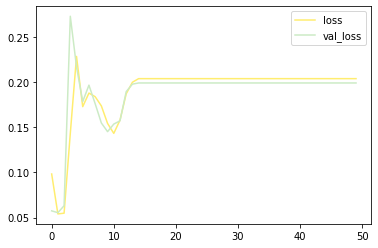

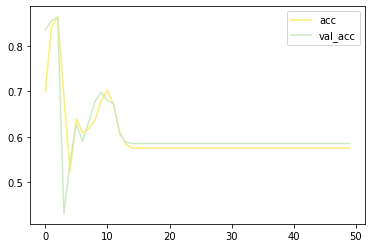

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [60]:


model_design = ModelDesign(
    tf.keras.Input(shape=(20,), name='input_layer'),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
)

model = model_design()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredLogarithmicError(),
    metrics=['acc']
)
model.fit(
    X,
    Y,
    epochs=50,
    validation_split=0.4,
    shuffle=True
)

model_analyzer = ModelAnalyzer(model)

model_analyzer.plot_metrics(['loss', 'val_loss'])
model_analyzer.plot_metrics(['acc', 'val_acc'])

Epoch 1/50
6/6 [==============================] - 2s 88ms/step - loss: 29.4257 - acc: 0.6017 - val_loss: 24.1679 - val_acc: 0.5900
Epoch 2/50
6/6 [==============================] - 0s 45ms/step - loss: 20.9613 - acc: 0.6833 - val_loss: 16.8434 - val_acc: 0.7800
Epoch 3/50
6/6 [==============================] - 0s 44ms/step - loss: 14.4233 - acc: 0.7633 - val_loss: 11.3618 - val_acc: 0.7725
Epoch 4/50
6/6 [==============================] - 0s 46ms/step - loss: 9.6094 - acc: 0.8150 - val_loss: 7.4295 - val_acc: 0.8325
Epoch 5/50
6/6 [==============================] - 0s 44ms/step - loss: 6.2145 - acc: 0.8517 - val_loss: 4.7234 - val_acc: 0.8550
Epoch 6/50
6/6 [==============================] - 0s 48ms/step - loss: 3.9049 - acc: 0.8683 - val_loss: 2.9246 - val_acc: 0.8425
Epoch 7/50
6/6 [==============================] - 0s 47ms/step - loss: 2.3956 - acc: 0.8683 - val_loss: 1.7711 - val_acc: 0.8625
Epoch 8/50
6/6 [==============================] - 0s 50ms/step - loss: 1.4388 - acc: 0.8717

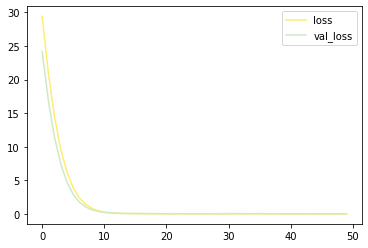

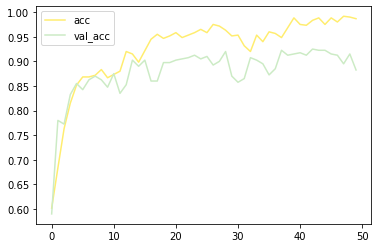

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [57]:
dropout_rate = .4
regularizer = 'l2'

model = tf.keras.Sequential(
    layers = [
        tf.keras.layers.Dense(200, activation=tf.nn.relu, input_shape=(20,)),
        tf.keras.layers.Dense(1000, kernel_regularizer=regularizer),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1000, kernel_regularizer=regularizer),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1000, kernel_regularizer=regularizer),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1000, kernel_regularizer=regularizer),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(200, activation=tf.nn.relu),
        tf.keras.layers.Dense(100, activation=tf.nn.relu),
        tf.keras.layers.Dense(50, activation=tf.nn.relu),
        tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ]
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredLogarithmicError(),
    metrics=['acc']
)
model.fit(
    X,
    Y,
    epochs=50,
    validation_split=0.4,
    shuffle=True,
    batch_size=100,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),]
)

model_analyzer = ModelAnalyzer(model)

model_analyzer.plot_metrics(['loss', 'val_loss'])
model_analyzer.plot_metrics(['acc', 'val_acc'])

input_layer
dense_168
input_layer_1DLYGYCKR4
dense_168_1DLYGY9EOG
Epoch 1/50
6/6 [==============================] - 1s 36ms/step - loss: 0.1101 - acc: 0.7233 - val_loss: 0.0813 - val_acc: 0.8050
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0798 - acc: 0.7950 - val_loss: 0.0649 - val_acc: 0.8375
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0728 - acc: 0.8017 - val_loss: 0.0621 - val_acc: 0.8425
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0717 - acc: 0.8083 - val_loss: 0.0662 - val_acc: 0.8375
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0698 - acc: 0.8100 - val_loss: 0.0645 - val_acc: 0.8300
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0687 - acc: 0.8067 - val_loss: 0.0656 - val_acc: 0.8250
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0680 - acc: 0.8150 - val_loss: 0.0640 - val_acc: 0.8300
Epoch 8/50
6/6 [=====================

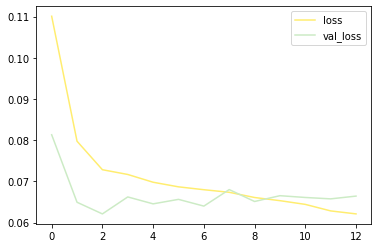

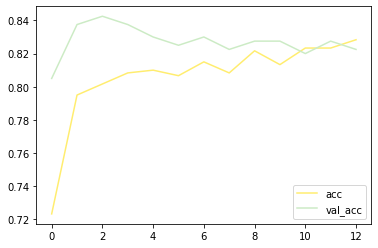

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:


tail = ModelDesign(
    None,
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
)

model_design = ModelDesign(
    tf.keras.Input(shape=(20,), name='input_layer'),
    tf.keras.layers.Dense(1000, activation=tf.nn.relu),
    tail
)
print(model_design._inputs.name)
for l in model_design:
    if hasattr(l, 'name'):
        print(l.name)

print(model_design.copy()._inputs.name)
for l in model_design.copy():
    if hasattr(l, 'name'):
        print(l.name)

model = model_design.build()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredLogarithmicError(),
    metrics=['acc']
)
model.fit(
    data,
    Y,
    epochs=50,
    validation_split=0.4,
    shuffle=True,
    batch_size=100,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),]
)

model_analyzer = ModelAnalyzer(model)

model_analyzer.plot_metrics(['loss', 'val_loss'])
model_analyzer.plot_metrics(['acc', 'val_acc'])

(None, 1)
Epoch 1/50
6/6 [==============================] - 10s 433ms/step - loss: 841.3552 - acc: 0.5917 - val_loss: 807.2704 - val_acc: 0.7050
Epoch 2/50
6/6 [==============================] - 0s 22ms/step - loss: 783.5560 - acc: 0.7667 - val_loss: 750.7845 - val_acc: 0.7975
Epoch 3/50
6/6 [==============================] - 0s 22ms/step - loss: 727.9734 - acc: 0.8183 - val_loss: 696.4476 - val_acc: 0.7975
Epoch 4/50
6/6 [==============================] - 0s 25ms/step - loss: 674.4775 - acc: 0.8267 - val_loss: 644.1236 - val_acc: 0.8100
Epoch 5/50
6/6 [==============================] - 0s 23ms/step - loss: 622.9955 - acc: 0.8317 - val_loss: 593.8273 - val_acc: 0.8150
Epoch 6/50
6/6 [==============================] - 0s 20ms/step - loss: 573.5199 - acc: 0.8350 - val_loss: 545.5115 - val_acc: 0.8025
Epoch 7/50
6/6 [==============================] - 0s 21ms/step - loss: 526.0450 - acc: 0.8233 - val_loss: 499.2309 - val_acc: 0.7650
Epoch 8/50
6/6 [==============================] - 0s 23ms

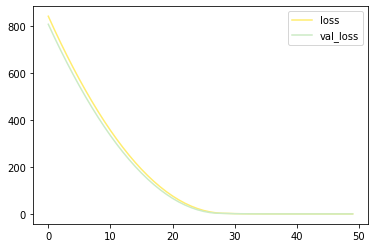

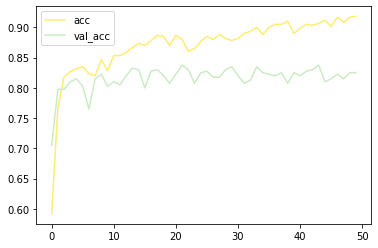

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [30]:

data, Y = make_classification(
    n_samples=1000, n_features=20, n_redundant=15, n_informative=1, n_clusters_per_class=1, class_sep=.2
)

tail = ModelDesign(
    None,
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
)

main = ModelDesign(
    None,
    ParallelDesign(
        *[tf.keras.layers.Dense(100) for _ in range(10)],
        activation='relu'
    )
)

model_design = ModelDesign(
    tf.keras.Input(shape=(20,), name='input_layer'),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    ParallelDesign(
        None,
        ParallelDesign(
            main.copy(),
            main.copy(),
            ParallelDesign(
                None,
                main.copy(),
                main.copy(),
                main.copy(),
                activation='relu'
            )
        ),
        ParallelDesign(
            None,
            main.copy(),
            main.copy(),
            main.copy(),
            main.copy(),
            main.copy(),
            activation='relu'
        ),
        activation='relu'
    ),
    tail
)

print(model_design().shape)

model = model_design.build()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredLogarithmicError(),
    metrics=['acc']
)
model.fit(
    data,
    Y,
    epochs=50,
    validation_split=0.4,
    shuffle=True,
    batch_size=100,
    # callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),]
)

model_analyzer = ModelAnalyzer(model)

model_analyzer.plot_metrics(['loss', 'val_loss'])
model_analyzer.plot_metrics(['acc', 'val_acc'])

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [13]:
n_samples, w, h, c = 100, 32, 32, 3

simple_conv_net = ModelDesign(
    tf.keras.Input(shape=(w, h, c), name='input_layer'),
    tf.keras.layers.Conv2D(32, (w//4, h//4), strides=(w//8, h//8), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(16, (4, 4), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(8, (2, 2), strides=(w//8, h//8), activation=tf.nn.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
)


TensorShape([None, 1, 1, 8])

Epoch 1/50
938/938 [==============================] - 6s 6ms/step - loss: 2.0990 - acc: 0.2116 - val_loss: 1.9817 - val_acc: 0.2664
Epoch 2/50
938/938 [==============================] - 5s 6ms/step - loss: 1.9660 - acc: 0.2696 - val_loss: 2.0167 - val_acc: 0.2743
Epoch 3/50
938/938 [==============================] - 5s 6ms/step - loss: 1.9004 - acc: 0.2989 - val_loss: 1.8959 - val_acc: 0.3052
Epoch 4/50
938/938 [==============================] - 6s 6ms/step - loss: 1.8637 - acc: 0.3140 - val_loss: 1.8617 - val_acc: 0.3213
Epoch 5/50
938/938 [==============================] - 5s 6ms/step - loss: 1.8390 - acc: 0.3243 - val_loss: 1.8570 - val_acc: 0.3100
Epoch 6/50
938/938 [==============================] - 6s 6ms/step - loss: 1.8199 - acc: 0.3357 - val_loss: 1.8197 - val_acc: 0.3291
Epoch 7/50
938/938 [==============================] - 6s 6ms/step - loss: 1.8095 - acc: 0.3375 - val_loss: 1.8135 - val_acc: 0.3386
Epoch 8/50
938/938 [==============================] - 6s 6ms/step - loss: 1.

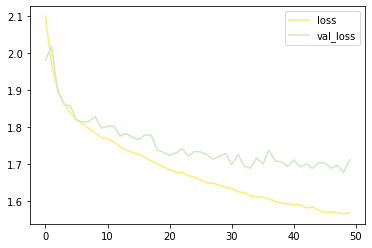

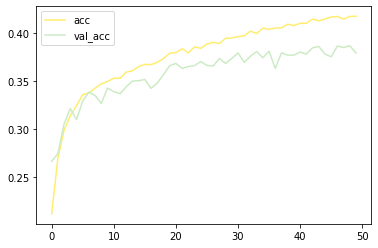

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [119]:
n_samples, w, h, c = x_train.shape

conv_net = ModelDesign(
    tf.keras.Input(shape=(w, h, c), name='input_layer'),
    tf.keras.layers.Conv2D(32, (w//4, h//4), strides=(w//8, h//8), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(16, (4, 4), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(8, (2, 2), strides=(w//8, h//8), activation=tf.nn.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
)


model = conv_net.build()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['acc']
)

Y_train = np.zeros((n_samples, 10))

for i, y in enumerate(y_train):
    Y_train[i, y[0]] = 1

model.fit(
    x_train,
    Y_train,
    epochs=50,
    validation_split=0.4,
    shuffle=True,
)


model_analyzer = ModelAnalyzer(model)

model_analyzer.plot_metrics(['loss', 'val_loss'])
model_analyzer.plot_metrics(['acc', 'val_acc'])


In [5]:
n_samples, w, h, c = x_train.shape

res_conv_net1 = ModelDesign(
    None,
    tf.keras.layers.Conv2D(32, (w//8, h//8), padding='SAME', strides=(w//8, h//8), activation=tf.nn.relu),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Conv2D(32, (w//6, h//6), padding='SAME', activation=tf.nn.relu),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(32, (w//4, h//4), padding='SAME', activation=tf.nn.relu),
    tf.keras.layers.Dropout(.3),
)
res_conv_net2 = ModelDesign(
    None,
    tf.keras.layers.Conv2D(32, (w//8, h//8), padding='SAME', strides=(w//16, h//16), activation=tf.nn.relu, kernel_regularizer='l1'),
    tf.keras.layers.Conv2D(32, (w//4, h//4), padding='SAME', strides=(w//16, h//16), activation=tf.nn.relu, kernel_regularizer='l2'),
)
res_conv_net3 = ModelDesign(
    None,
    tf.keras.layers.Conv2D(32, (w//8, h//8), padding='VALID', strides=(w//8, h//8), activation=tf.nn.elu),
)

def res_block(X):
    X_res_1, X_res_2  = X, X
    X_res_1 = res_conv_net1(X_res_1)
    X_res_2 = res_conv_net2(X_res_2)
    X = res_conv_net3(X)
    X = tf.keras.layers.Add()([X, X_res_1, X_res_2])
    
    return X

conv_net = ModelDesign(
    tf.keras.Input(shape=(w, h, c), name='input_layer'),
    res_block,
    tf.keras.layers.Conv2D(16, (4, 4), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(8, (2, 2), strides=(w//8, h//8), activation=tf.nn.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
)

conv_net().shape

TensorShape([None, 10])

Epoch 1/50
938/938 [==============================] - 39s 40ms/step - loss: 2.2886 - acc: 0.1671 - val_loss: 1.9012 - val_acc: 0.2716
Epoch 2/50
938/938 [==============================] - 37s 40ms/step - loss: 1.8514 - acc: 0.2917 - val_loss: 1.7121 - val_acc: 0.3428
Epoch 3/50
938/938 [==============================] - 39s 42ms/step - loss: 1.7175 - acc: 0.3382 - val_loss: 1.6476 - val_acc: 0.3650
Epoch 4/50
938/938 [==============================] - 40s 43ms/step - loss: 1.6434 - acc: 0.3629 - val_loss: 1.6210 - val_acc: 0.3776
Epoch 5/50
938/938 [==============================] - 38s 41ms/step - loss: 1.5963 - acc: 0.3911 - val_loss: 1.5799 - val_acc: 0.4094
Epoch 6/50
938/938 [==============================] - 38s 40ms/step - loss: 1.5456 - acc: 0.4164 - val_loss: 1.4830 - val_acc: 0.4525
Epoch 7/50
938/938 [==============================] - 37s 39ms/step - loss: 1.4936 - acc: 0.4405 - val_loss: 1.4642 - val_acc: 0.4506
Epoch 8/50
938/938 [==============================] - 39s 41ms

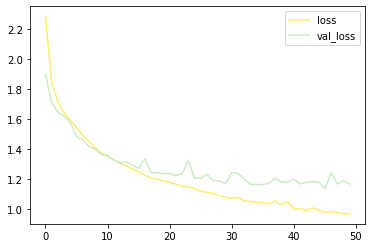

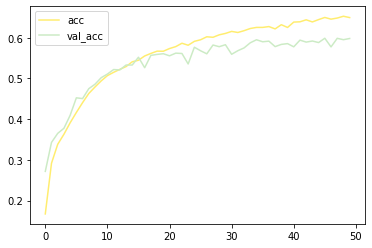

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
model = conv_net.build()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['acc']
)

Y_train = np.zeros((n_samples, 10))

for i, y in enumerate(y_train):
    Y_train[i, y[0]] = 1

model.fit(
    x_train,
    Y_train,
    epochs=50,
    validation_split=0.4,
    shuffle=True,
)


model_analyzer = ModelAnalyzer(model)

model_analyzer.plot_metrics(['loss', 'val_loss'])
model_analyzer.plot_metrics(['acc', 'val_acc'])

In [17]:
from utils.machine_learning import one_hot_decoder, one_hot_encoder

y_test = one_hot_encoder(y_test)

loss, acc = model.evaluate(x_test, y_test)

acc

313/313 [==============================] - 3s 11ms/step - loss: 1.1680 - acc: 0.5979


0.5978999733924866

In [15]:
from sklearn.metrics import accuracy_score

y_pred = model(x_test)
accuracy_score(one_hot_decoder(y_test), one_hot_decoder(y_pred.numpy()))

2022-02-23 19:42:00.705725: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 327680000 exceeds 10% of free system memory.
2022-02-23 19:42:00.782377: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 327680000 exceeds 10% of free system memory.


0.5979